# Mandelbroti hulk ja Julia hulgad

Üks kõige tuntumatest näidetest on [Mandelbroti hulk](http://en.wikipedia.org/wiki/Mandelbrot_set). Sellega tihedalt seotud on [Julia hulgad](http://en.wikipedia.org/wiki/Julia_set). See tööleht näitab, kuidas nad on konstrueeritud. Selleks kasutame NumPy ja PyPlot:

In [3]:
from PIL import Image
import IPython.display as disp
import numpy as np
import numpy.random as rnd
from multiprocessing import Pool, cpu_count
from io import BytesIO
import matplotlib.pyplot as plt

Kuna joonistused on suuremad kui tavaliselt, suurendame ka tulemusala.

In [4]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

Enne kui me alustame, on kasulik defineerida mitu abifunktsiooni. Esimene funktsioon konverteerib täisarvu "vikerkaare" värviks:

In [3]:
def rcolor(n):
    k = n % 1530
    r = max(0, min(255, 510 - abs(k - 1020)))
    g = max(0, min(255, 510 - abs(k - 510)))
    b = max(0, min(255, abs(k - 765) - 255))
    return (r, g, b)

Lisaks defineerime funktsiooni, mis samuti konverteerib täisarvu värviks, aga seekord nii, et järgnevad värvid on võimalikult erinevad:

In [4]:
def pcolor(n):
    return ((41 * n) % 256, (71 * n) % 256, (113 * n) % 256)

Samuti on värvikonstandid kasulikud:

In [5]:
black = (0, 0, 0)
white = (255, 255, 255)

Värvipildi näitamiseks defineerime funktsiooni, mis konverteerib värvikoode PNG graafikuks:

In [6]:
def showimg(col):
    b = BytesIO()
    imr = Image.fromarray(col)
    imr.save(b, format='png')
    disp.display_png(b.getvalue(), raw=True)

Lõpuks abifunktsioon, mis annab meile punkte võre peal ristkülikust kompleksarvude hulgas:

In [7]:
def clattice(zmin, zmax, nx, ny):
    xmin = zmin.real
    ymin = zmin.imag
    xmax = zmax.real
    ymax = zmax.imag
    return [complex(xmin + i * (xmax - xmin) / (nx - 1), ymax - j * (ymax - ymin) / (ny - 1)) for j in range(ny) for i in range(nx)]

## Mandelbroti hulk

Üks tüüpiline näide fraktaalide teemal on Mandelbroti hulk. Selle hulga definitsiooni aluseks on diskreetne dünaamiline süsteem faasiruumis $Q = \mathbb{C}$, mille dünaamika on

$$z_{n + 1} = f_c(z_n) = z_n^2 + c,$$

mis sõltub konstantsest parameetrist $c \in \mathbb{C}$. Algtingimuseks valime $z_0 = 0$. Parameeter $c$ kuulub Mandelbroti hulka, siis kui vastav trajektoor on tõkestatud. Seega võib defineerida:

$$M = \{c \in \mathbb{C}, f_c^n(0) \text{ on tõkestatud kui } n \to \infty\}.$$

Trajektoori käitumise uurimiseks aitab meid kolmnurga võrratus. Kui me valime $|z_n| > \max(2, |c|)$, siis leiame

$$\begin{split}
|z_{n + 1}| &\geq |z_n^2| - |c|\\
&= |z_n|^2 - |c|\\
&\geq 2|z_n| - |c|\\
&\geq 2|z_n| - |z_n|\\
&= |z_n|.
\end{split}$$

Sellest järeldub, et kui on olemas $n \in \mathbb{N}$ nii, et $|z_n| > \max(2, |c|)$, siis trajektoori liikmete $z_n$ absoluutväärtus kasvab igal sammul, ja seega trajektoor hajub. Selleks et uurida kas $c$ kuulub Mandelbroti hulka või mitte, võime seega kasutada sellist algoritmi:

* Alusta algtingimusest $z_0$.
* Igal sammul arvuta $z_{n + 1} = f_c(z_n) = z_n^2 + c$.
* Kui $|z_n| > \max(2, |c|)$, siis $c \notin M$.
* Kui jääb $|z_n| < \max(2, |c|)$, siis $c \in M$.

Selleks et määrata kas trajektoor jääb tõkestatuks oleks muidugi vaja trajektoori lõpmatult arvutada. Kuna see ei ole võimalik, peame iteratsioonide arvu piirama. Sellega tegeleb alljärgnev kood, mis annab tulemusena värvi. Must värv tähendab, et arvutatud trajektoori osa on tõkestatud. Teised värvid näitavad, mitu sammu $n$ vaja oli kuni $|z_n| > \max(2, |c|)$.

In [8]:
def mjiter(z0, c, nmax):
    z = z0
    r = max(2, abs(c))
    for n in range(nmax):
        if abs(z) > r:
            return rcolor(n)
        z = z * z + c
    return black

Selle funktsiooni saame nüüd rakendada igale punktile võre peal ristkülikus kompleksarvude hulgas. Seda teeb alljärgnev funktsioon, ja joonistab tulemusi:

In [9]:
def mandimg(z0, cmin, cmax, nx, ny, nmax):
    pts = [(z0, c, nmax) for c in clattice(cmin, cmax, nx, ny)]
    with Pool() as pool:
        res = pool.starmap(mjiter, pts)
    col = np.array(res, dtype=np.uint8).reshape(ny, nx, 3)
    showimg(col)

Mandelbroti hulk on tähistatud musta värviga:

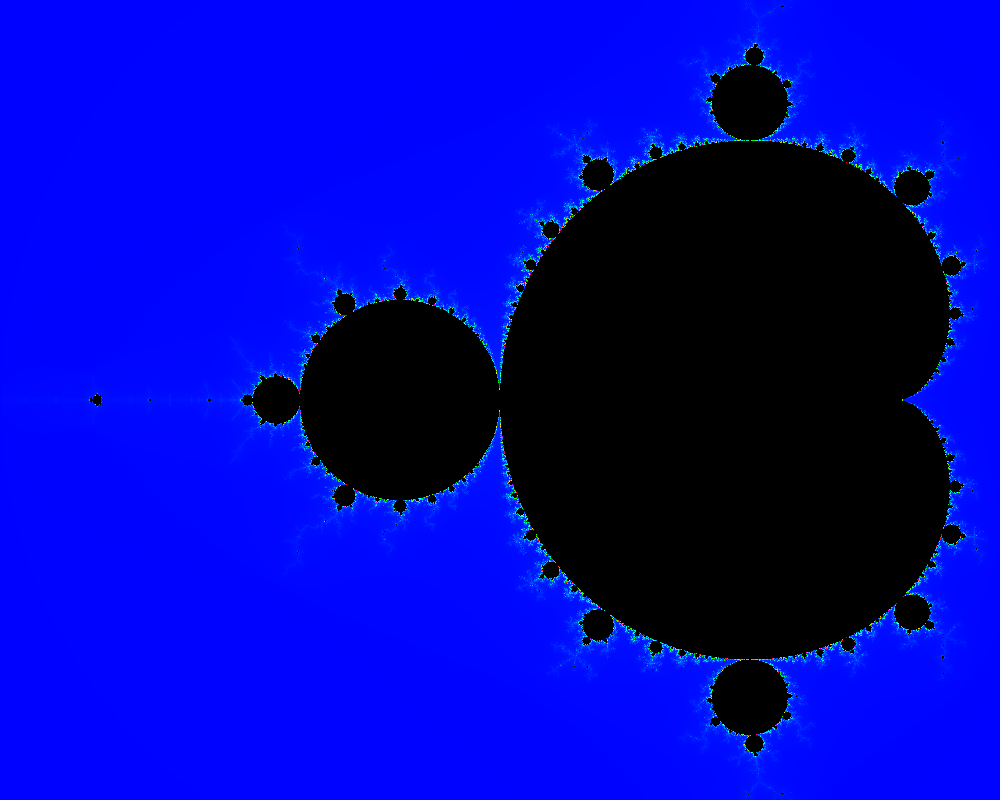

In [10]:
mandimg(0, -2.0-1.0j, 0.5+1.0j, 1000, 800, 4096)

Paistab, et Mandelbroti hulga äär on fraktaalne. Seda näeme paremini, kui me osa pildist suurendame.

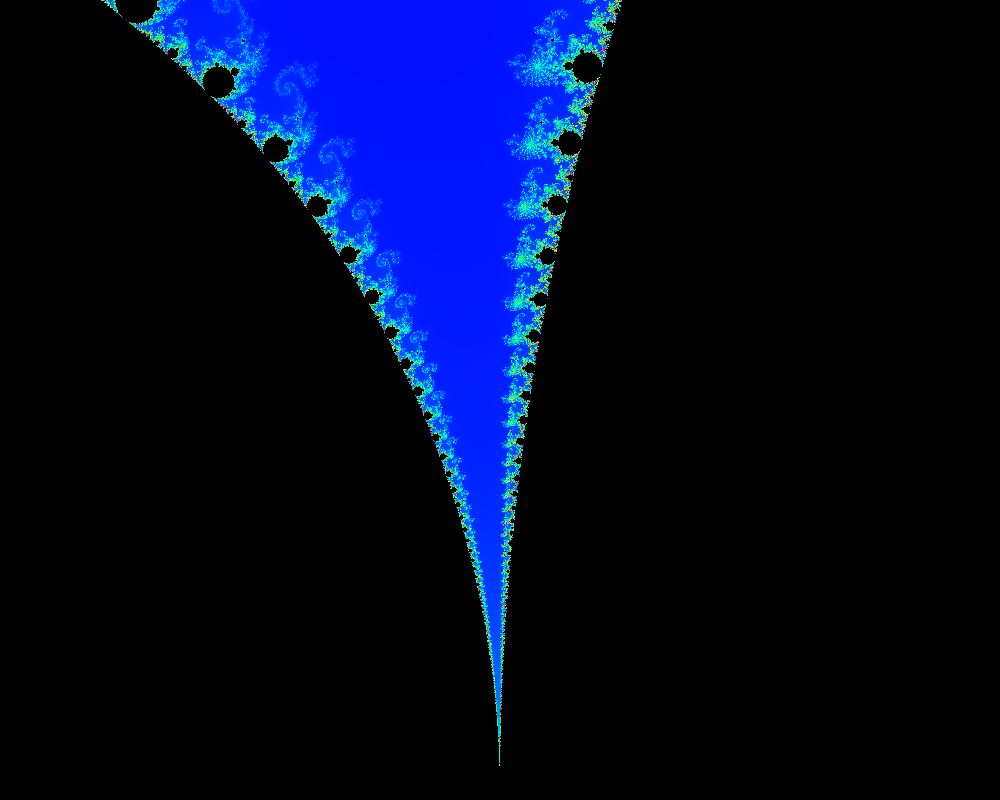

In [11]:
mandimg(0, -0.875, -0.625+0.2j, 1000, 800, 4096)

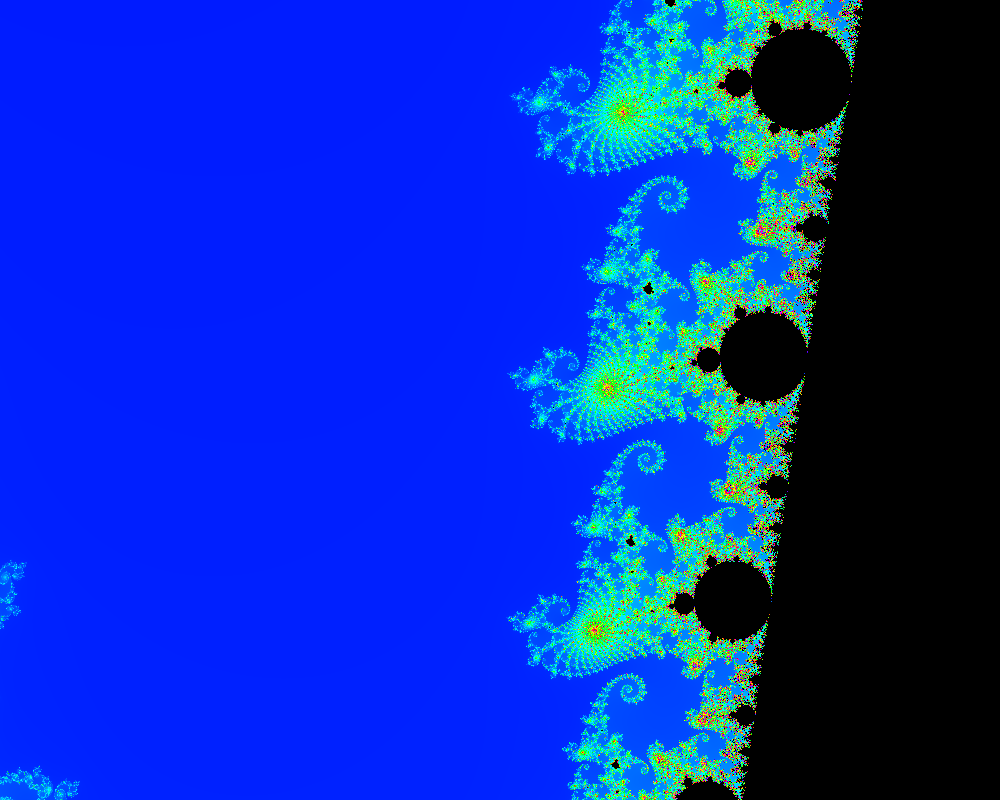

In [12]:
mandimg(0, -0.7625+0.09j, -0.7375+0.11j, 1000, 800, 4096)

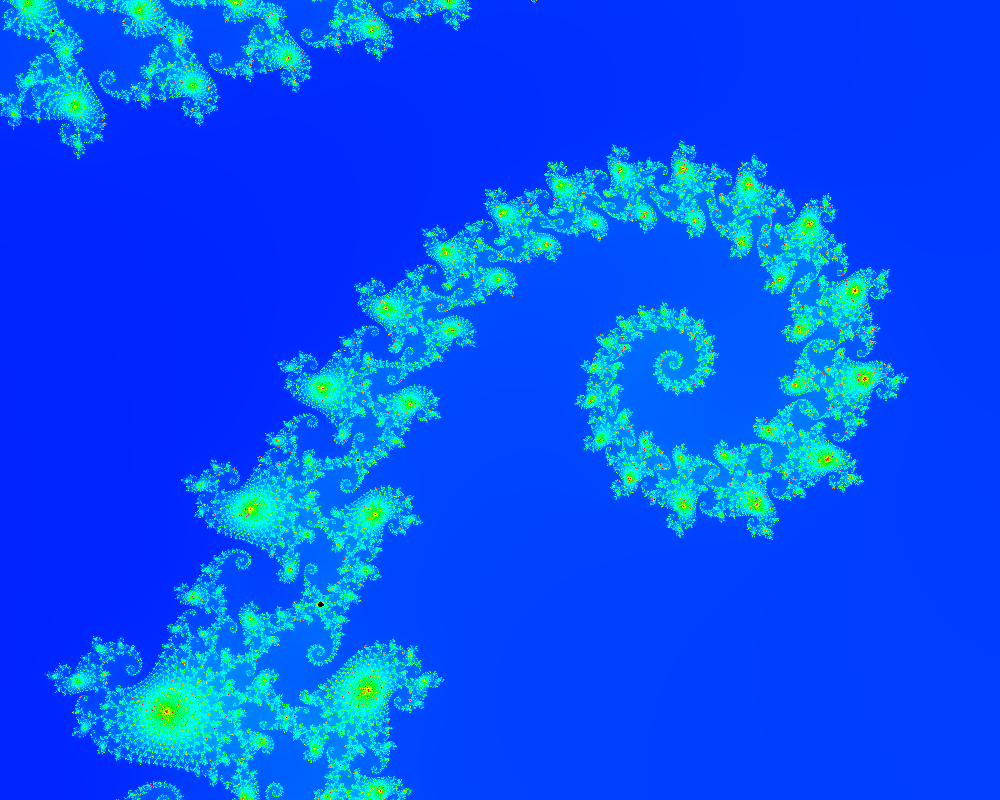

In [13]:
mandimg(0, -0.7475+0.104j, -0.745+0.106j, 1000, 800, 4096)

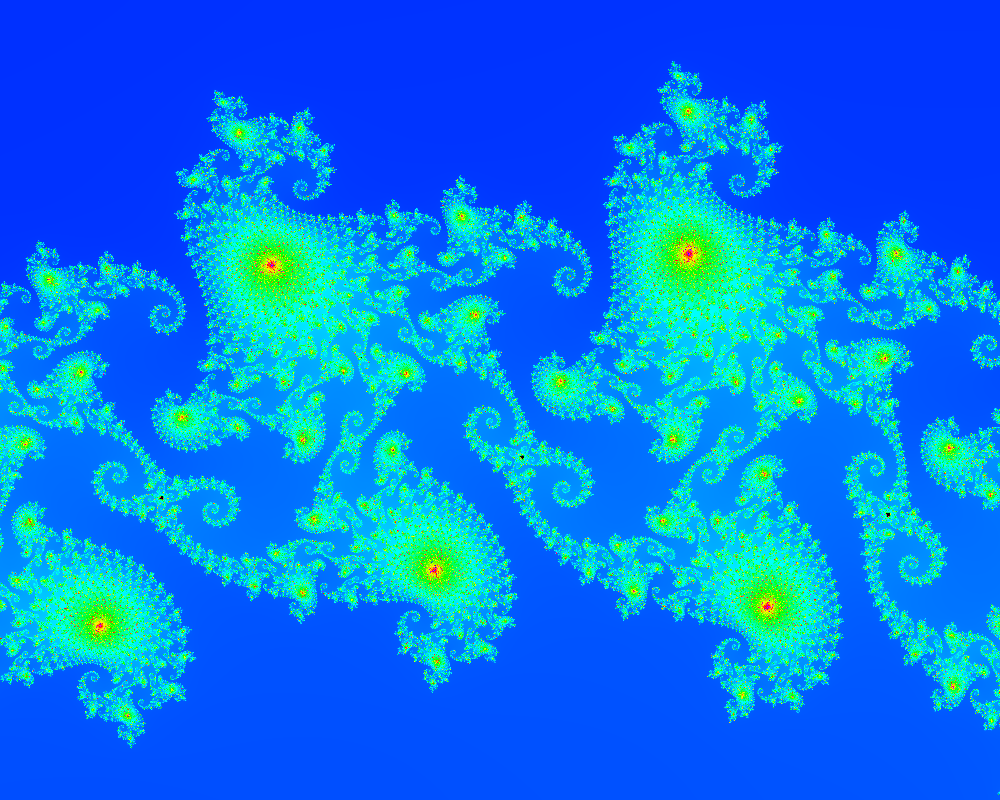

In [14]:
mandimg(0, -0.74605+0.105375j, -0.745675+0.105675j, 1000, 800, 4096)

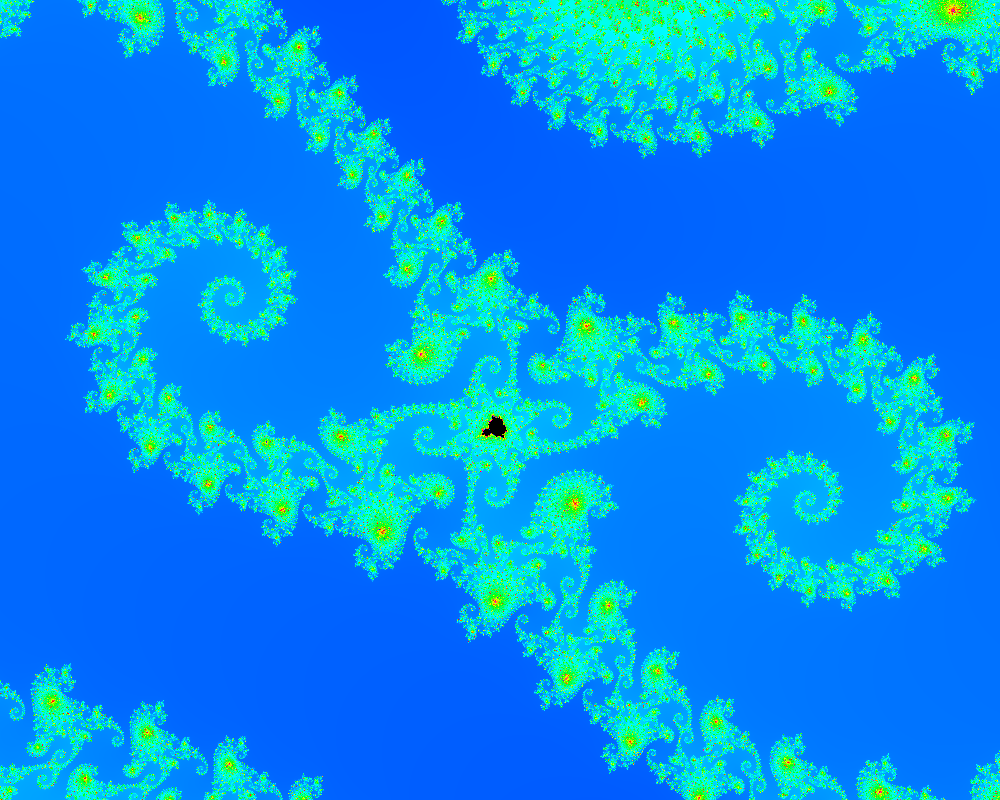

In [15]:
mandimg(0, -0.7460205+0.105465j, -0.745958+0.105515j, 1000, 800, 4096)

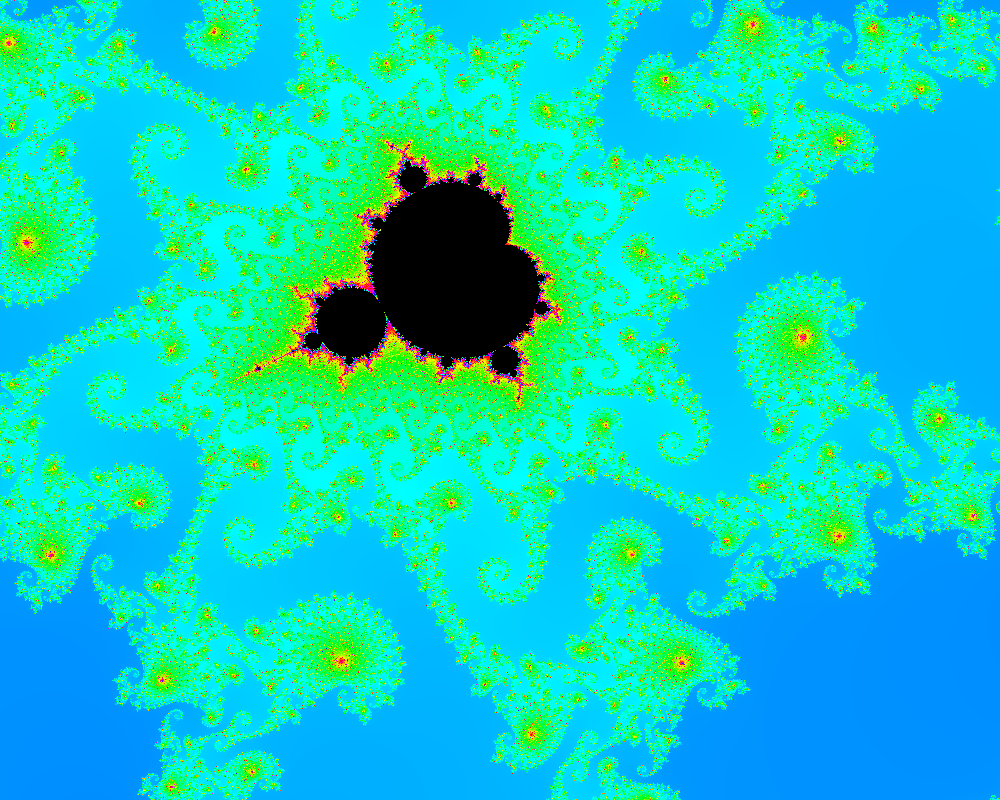

In [16]:
mandimg(0, -0.74599225+0.105485j, -0.745986+0.10549j, 1000, 800, 4096)

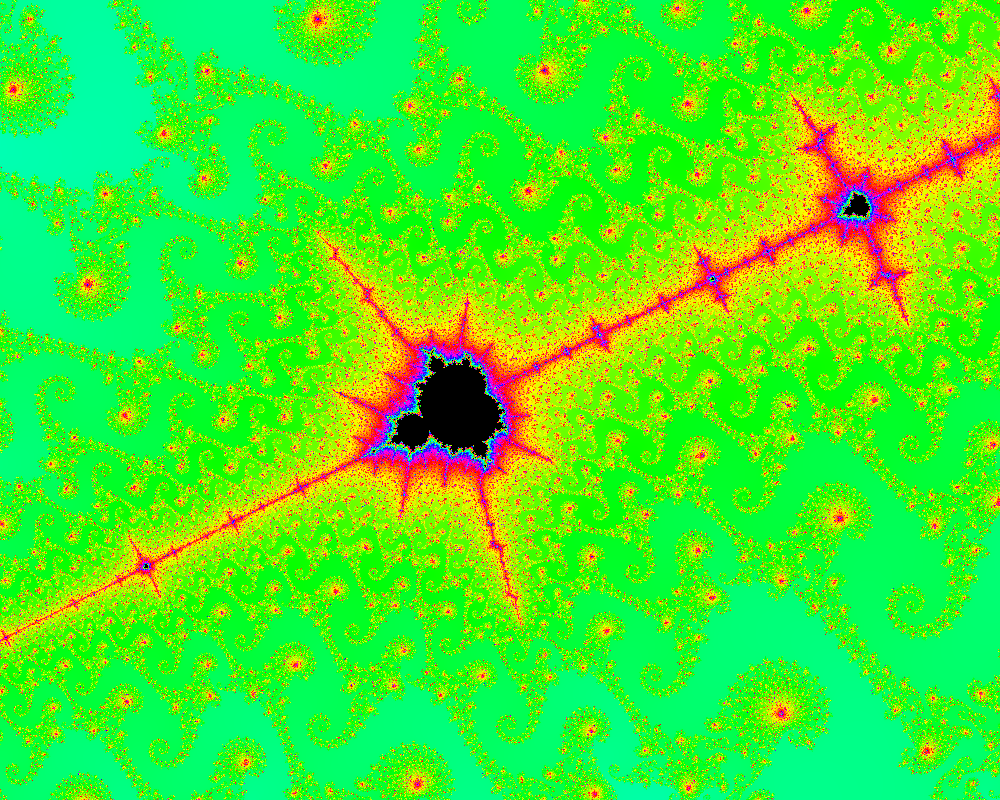

In [17]:
mandimg(0, -0.74599075+0.1054876j, -0.7459905+0.1054878j, 1000, 800, 4096)

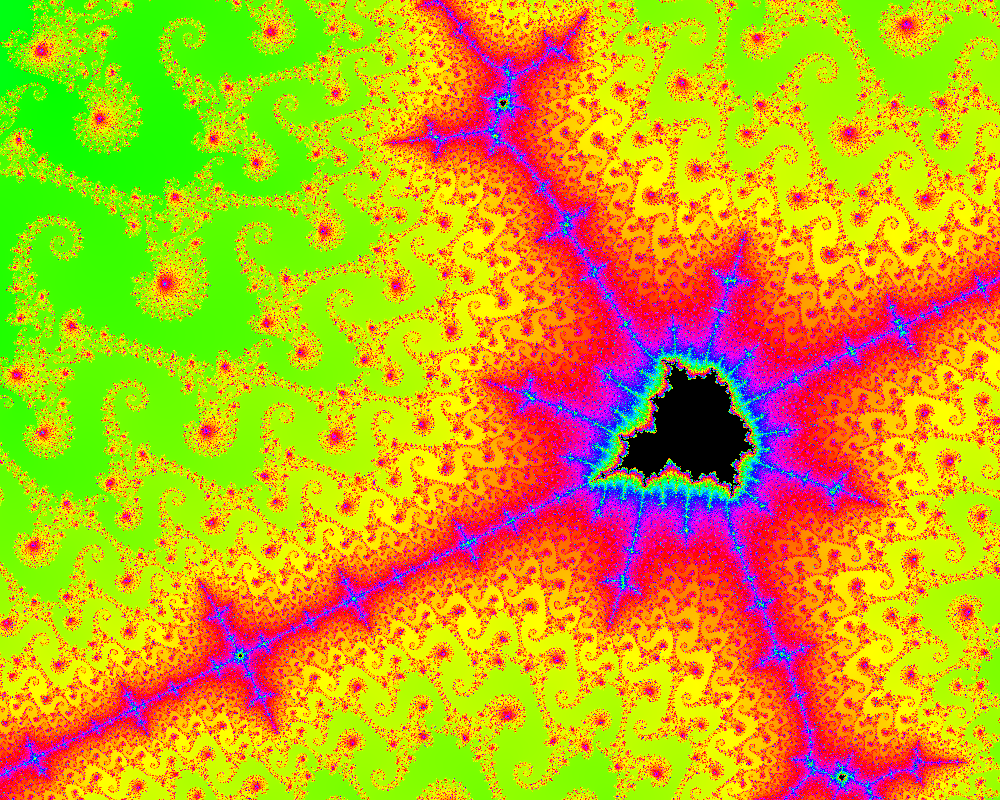

In [18]:
mandimg(0, -0.74599057+0.10548773j, -0.74599052+0.10548777j, 1000, 800, 4096)

Vaatlused näitavad:

* Mandelbroti hulk on enesesarnane.
* Mida lähemale me liigutame parameetri $c$ Mandelbroti hulgale, seda rohkem sammu on vaja, kuni trajektoor ületab piiri $\max(2, |c|)$.

## Bifurkatsioonid ja trajektooride stabiilsus

Mandelbroti hulga defnitsioon nõuab ainult, et trajektoor $x_n = f_c^n(0)$ on tõkestatud, aga ei piira täpsemalt trajektoori käitumist. Seda käitumist ja selle sõltuvust parameetrist $c$ uurime järgmisena. Selleks on kasulik defineerida funktsiooni, mis arvutab trajektoori ja annab meile värvi vastavalt käitumisele:

* Kui trajektoor hajub, värvime punkti valgeks.
* Kui trajektoor koondub perioodilisele trajektoorile, värvime punkti vastavalt perioodi pikkusele.
* Kui trajektoor käitub kaootiliselt, või periood on liiga pikk, värvime punkti mustaks.

Värvi määrab selline funktsioon:

In [19]:
def mjper(z0, c, eps, nmax):
    cycle = np.zeros(nmax, dtype=np.complex128)
    z = z0
    for n in range(nmax):
        if abs(z) > 2:
            return white
        cycle[n] = z
        z = z * z + c
    for n in range(nmax):
        if abs(z - cycle[nmax - n - 1]) < eps:
            return pcolor(n + 1)
    return black

Funktsiooni paralleelselt rakendamiseks defineerime lisaks:

In [20]:
def perimg(z0, cmin, cmax, nx, ny, eps, nmax):
    pts = [(z0, c, eps, nmax) for c in clattice(cmin, cmax, nx, ny)]
    with Pool() as pool:
        res = pool.starmap(mjper, pts)
    col = np.array(res, dtype=np.uint8).reshape(ny, nx, 3)
    showimg(col)

Järgnev skeem näitab, kuidas värvid vastavad perioodi pikkusele.

In [21]:
s = '<table><tr>'
for i in range(1, 31):
    c = pcolor(i)
    s = s + '<td style="background-color: #%02x%02x%02x">%d</td>' % (c[0], c[1], c[2], i)
s = s + '</tr></table>'
disp.HTML(s)

Nende funktsioonide abil saame nüüd Mandelbroti hulka uuesti joonistada ja seekord perioodilist käitumist uurida.

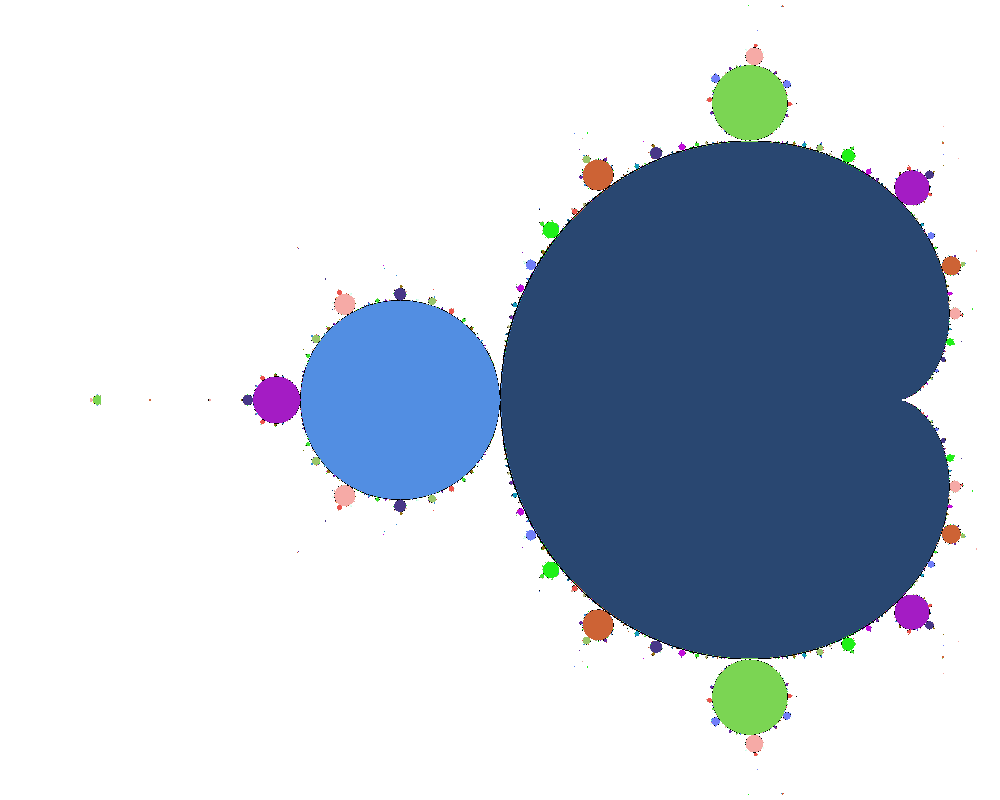

In [22]:
perimg(0, -2.0-1.0j, 0.5+1.0j, 1000, 800, 1e-6, 4096)

Paistab, et Mandelbroti hulk koosneb mitmest osast, mis vastavad erinevatele perioodi pikkustele. Neid võime nüüd eraldi uurida.

### Stabiilne püsipunkt

Süsteemi püsipunkte leiame, kui me lahendame võrrandit

$$z = f_c(z) = z^2 + c.$$

Lahendused on

$$z_* = \frac{1}{2} \pm \sqrt{\frac{1}{4} - c}.$$

Püsipunkt on stabiilne, kui $|f_c'(z_*)| < 1$. Kuna

$$f_c'(z_*) = 2z_* = 1 \pm \sqrt{1 - 4c},$$

järeldub, et maksimaalselt üks püsipunkt võib stabiilne olla. Selleks peab parameeter $c$ kuuluma hulka, mida piirab joon $2z_* = e^{i\phi}$, kus $\phi \in [0, 2\pi)$. Sellest järeldub, et hulga äär on

$$c = \frac{1 - (e^{i\phi} - 1)^2}{4}.$$

Seda võime ka joonistada, ja me leiame [kardioiidi](http://en.wikipedia.org/wiki/Cardioid), mis on suurim osa Mandelbroti hulgast:

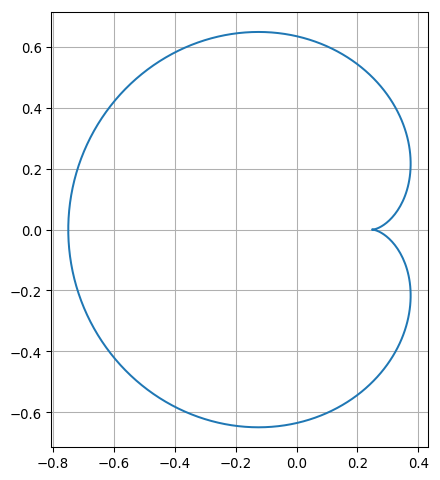

In [23]:
phi = np.linspace(0, 2 * np.pi, 250)
cc = (1 - (np.exp(phi * 1j) - 1) ** 2) / 4
re = [c.real for c in cc]
im = [c.imag for c in cc]
fig = plt.figure(figsize=(6, 6), dpi=96)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.plot(re, im)
ax.grid()
plt.show()

### Perioodide kahekordistumine

Mandelbroti hulga joonistusest näeme, et kardioiidist vasakul asub piirkond, kus tekib stabiilne, perioodiline trajektoor, mille periood on 2. Seda leiame, kui me lahendame

$$0 = f_c^2(z) - z = (z^2 + c)^2 + c - z = (z^2 - z + c)(z^2 + z + c + 1).$$

Lisaks püsipunktidele leiame lahendusi

$$z_{\#} = -\frac{1}{2} \pm \sqrt{-\frac{3}{4} - c}.$$

Perioodiline trajektoor, mis koosneb neist punktidest, on stabiilne, kui kehtib

$$\left|\left.\frac{d}{dz}f_c^2(z)\right|_{z = z_{\#}}\right| < 1$$.

Seda võime nüüd arvutada:

$$\begin{split}
\left.\frac{d}{dz}f_c^2(z)\right|_{z = z_{\#}} &= 4z_{\#}(z_{\#}^2 + c)\\
&= 4\left(-\frac{1}{2} + \sqrt{-\frac{3}{4} - c}\right)\left(-\frac{1}{2} - \sqrt{-\frac{3}{4} - c}\right)\\
&= 4\left[\frac{1}{4} - \left(-\frac{3}{4} - c\right)\right]\\
&= 4(1 + c).
\end{split}$$

Parameetrite hulk, mis vastab stabiilsele trajektoorile, on seega ring, mille raadius on $\frac{1}{4}$ ja mille keskpunkt on $-1$:

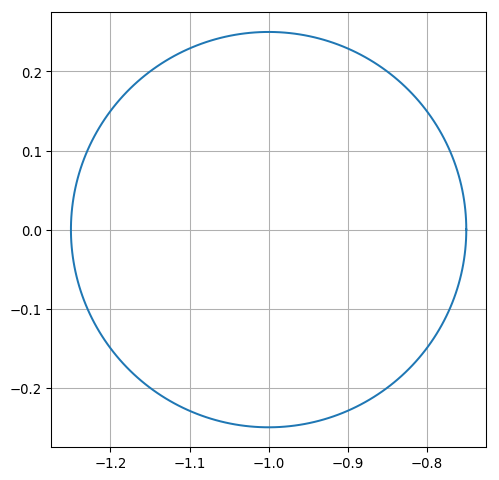

In [24]:
phi = np.linspace(0, 2 * np.pi, 250)
cc = -1 + np.exp(phi * 1j) / 4
re = [c.real for c in cc]
im = [c.imag for c in cc]
fig = plt.figure(figsize=(6, 6), dpi=96)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.plot(re, im)
ax.grid()
plt.show()

Sellest veel vasakul leiame, et ka kahest punktist loosnev trajektoor saab ebastabiilseks, ja perioodi pikkused kahekordistuvad. Ringide raadiuste suhed koonduvad Feigenbaumi konstandile $4.669\ldots$, ja nende keskpunktid koonduvad Myrebergi punktile $-1.40115\ldots$.

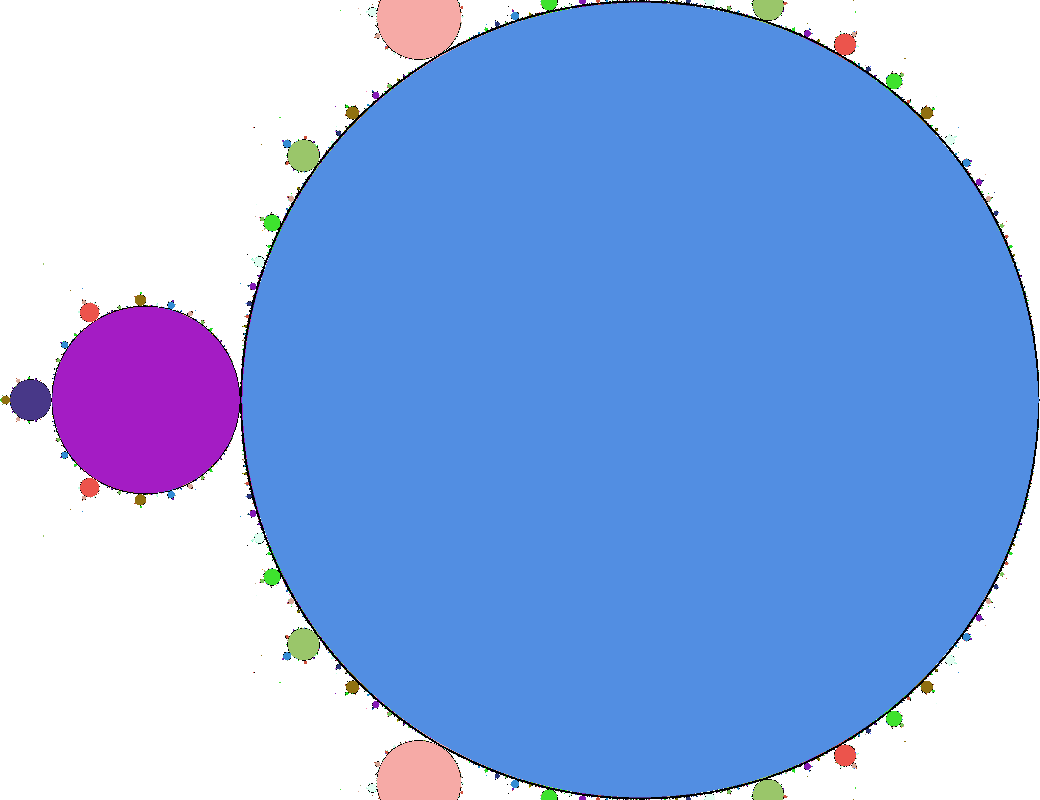

In [25]:
perimg(0, -1.4-0.25j, -0.75+0.25j, 1040, 800, 1e-6, 4096)

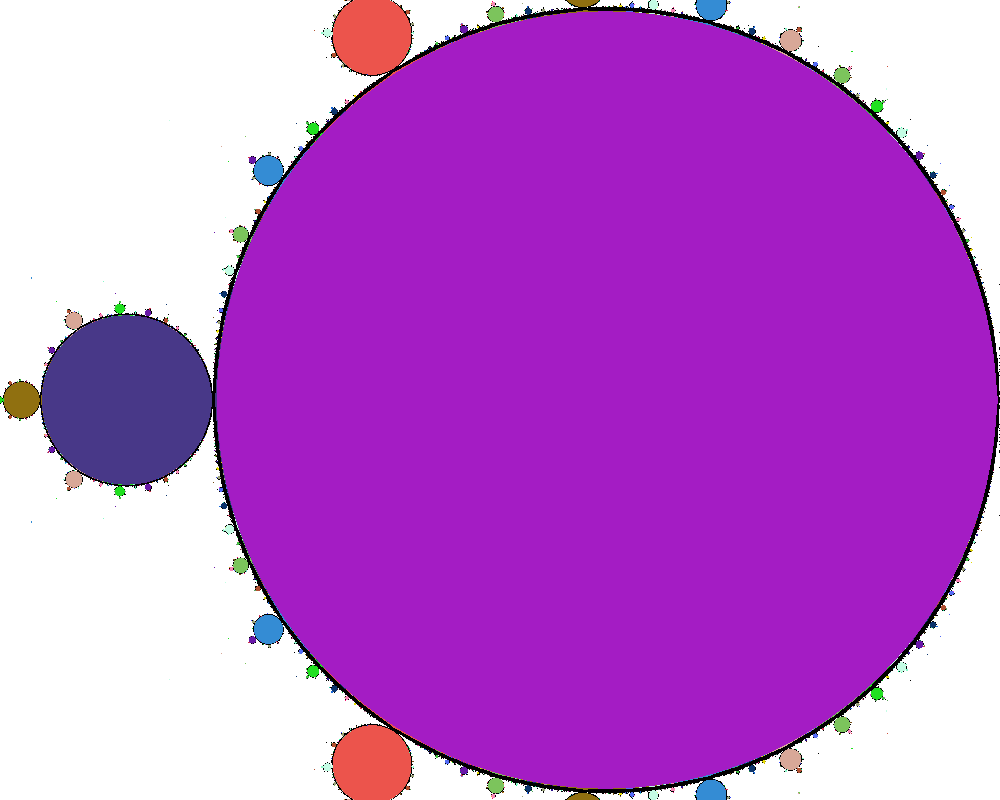

In [26]:
perimg(0, -1.4-0.06j, -1.25+0.06j, 1000, 800, 1e-6, 4096)

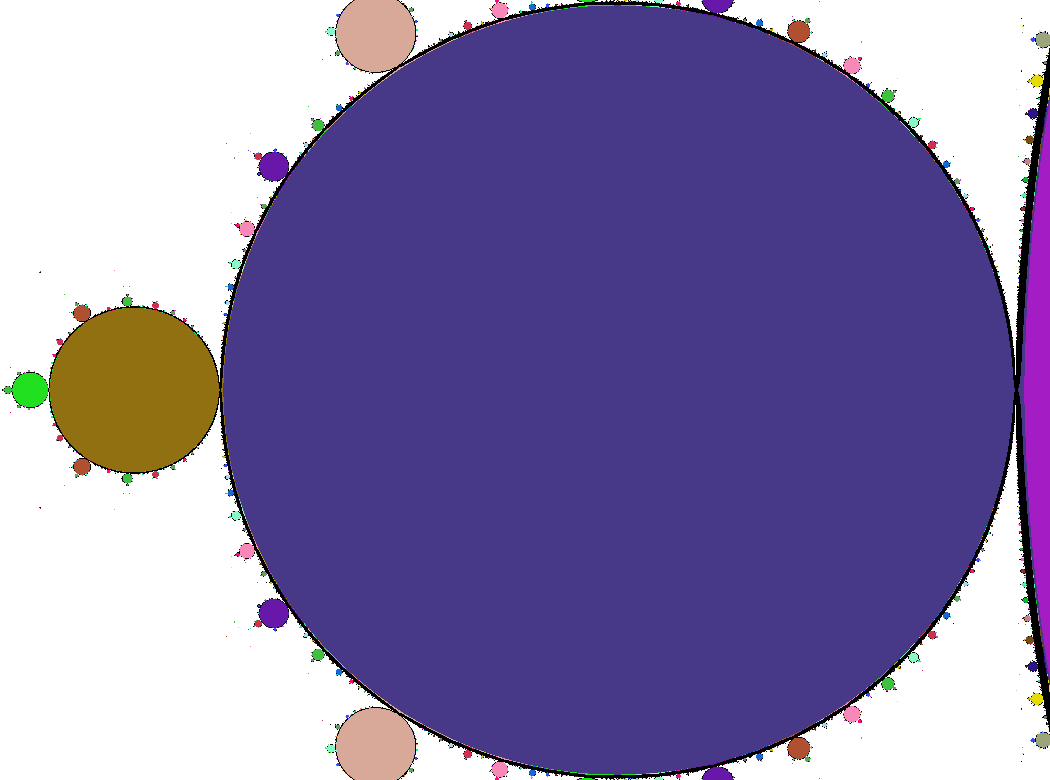

In [27]:
perimg(0, -1.4012-0.013j, -1.367+0.013j, 1050, 780, 1e-6, 8192)

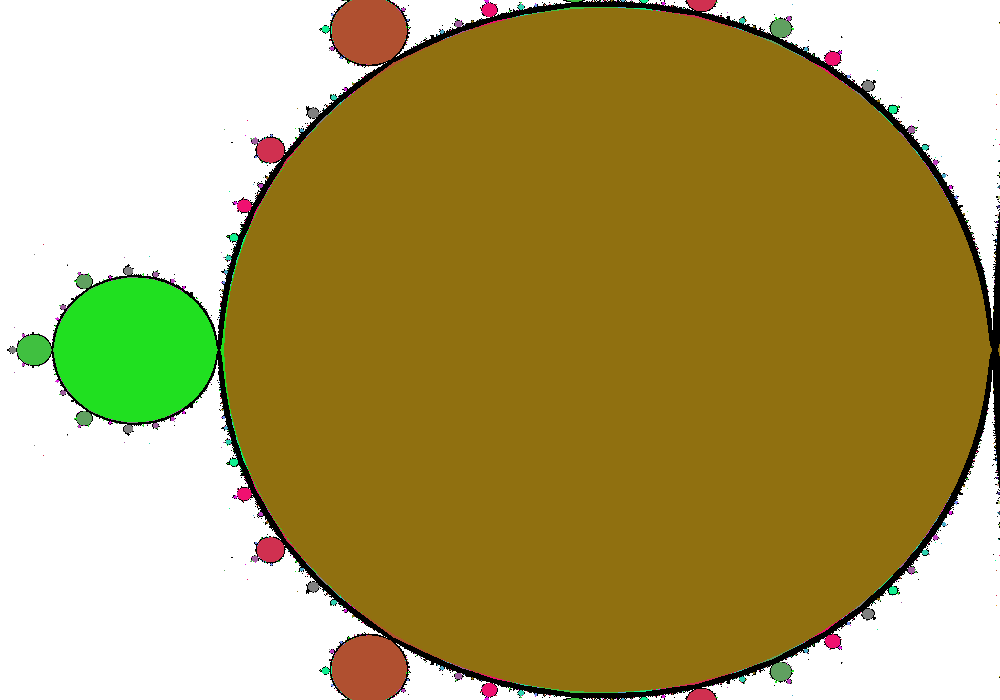

In [28]:
perimg(0, -1.4012-0.0028j, -1.394+0.0028j, 1000, 700, 1e-6, 8192)

### Perioodiline käitumine kaose vahel

Myrebergi punktist veel vasakul reaalteljel käitub süsteem kaootiliselt, kuid vahepeal ilmuvad ka parameetri piirkonnad, milles süsteem käitub perioodiliselt. Need piirkonnad meenutavad kogu Mandelbroti hulka. Siin on üks näide, kus kardioiidis on stabiilne trajektoor mille periood on 3, ja sellest vasakul perioodid kahekordistuvad.

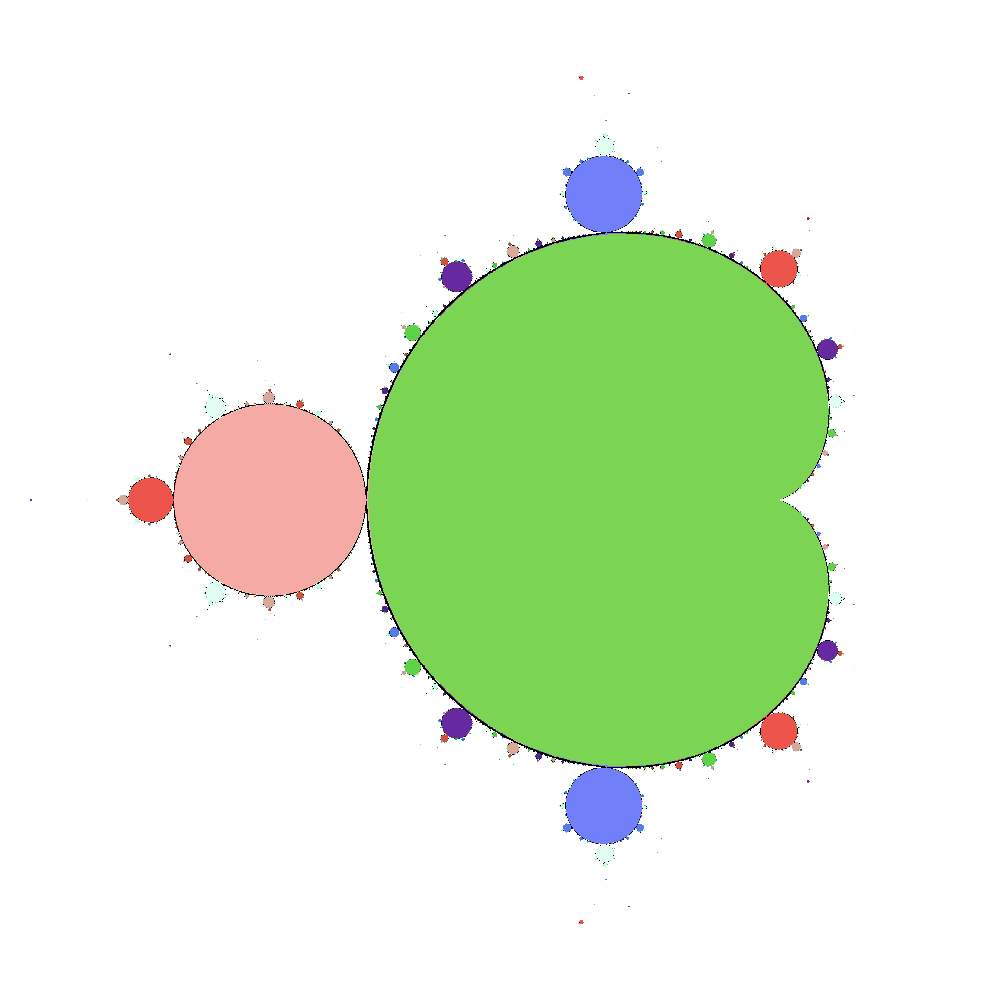

In [29]:
perimg(0, -1.785-0.0225j, -1.74+0.0225j, 1000, 1000, 1e-6, 4096)

### Põhiperioodid

Kardioiidi puudutavad "nibud", mis vastavad stabiilsete perioodilistele trajektooridele, mille periood on $k = 2, 3, 4, \ldots$. Nende puutepunktid kardioiidiga on

$$z_k = \frac{1 - \left(e^{\frac{2\pi i}{k}} - 1\right)^2}{4}.$$

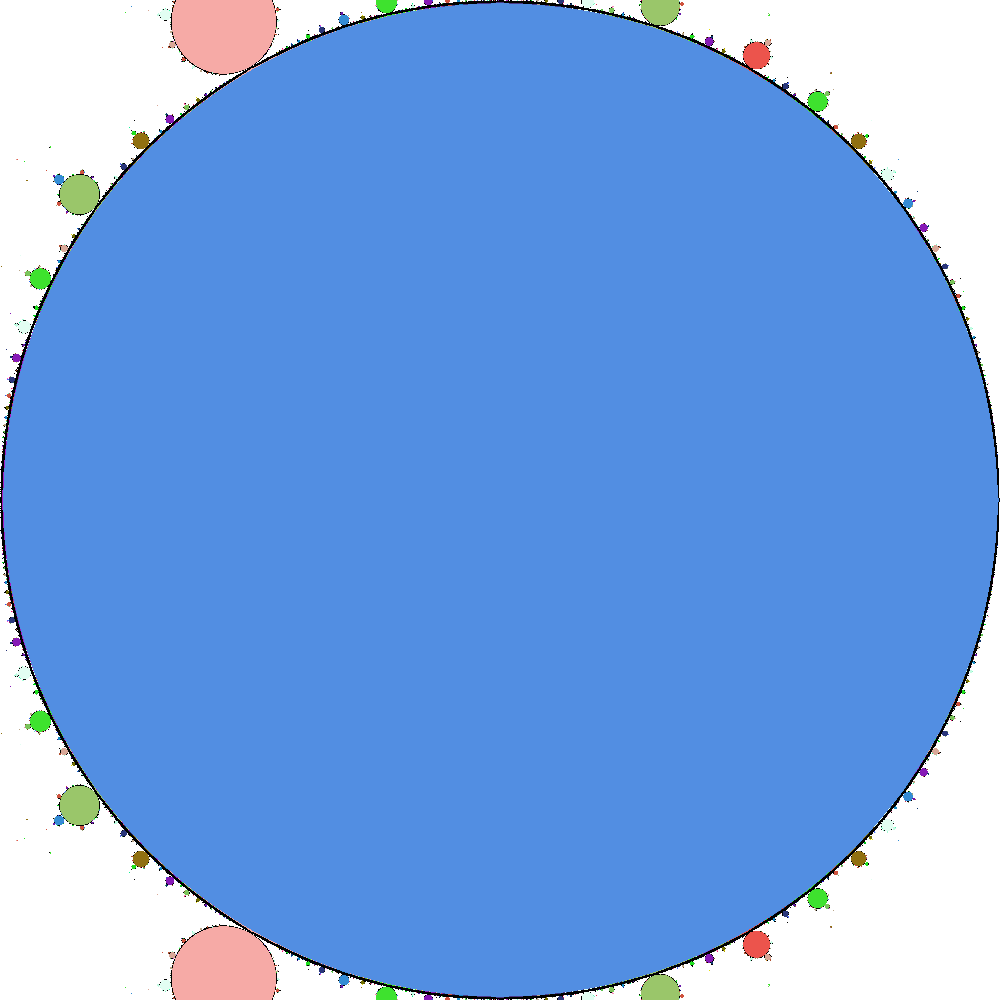

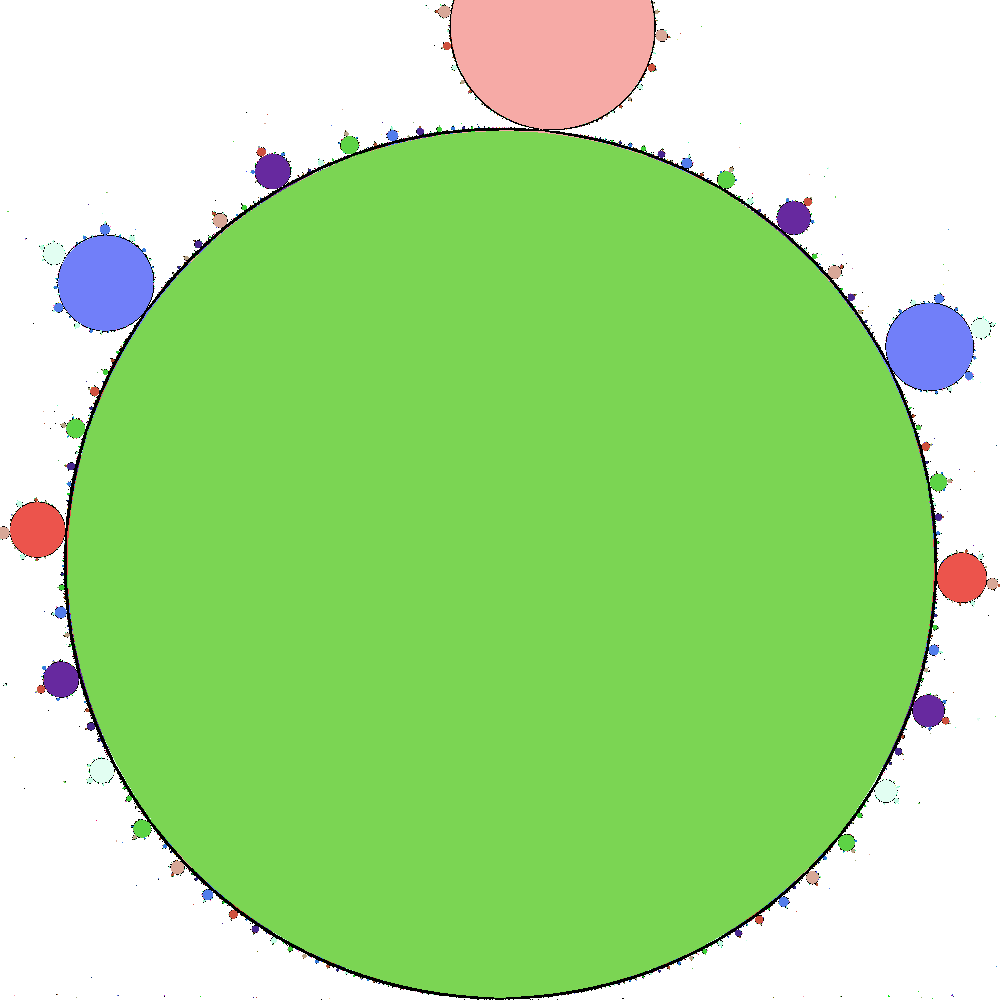

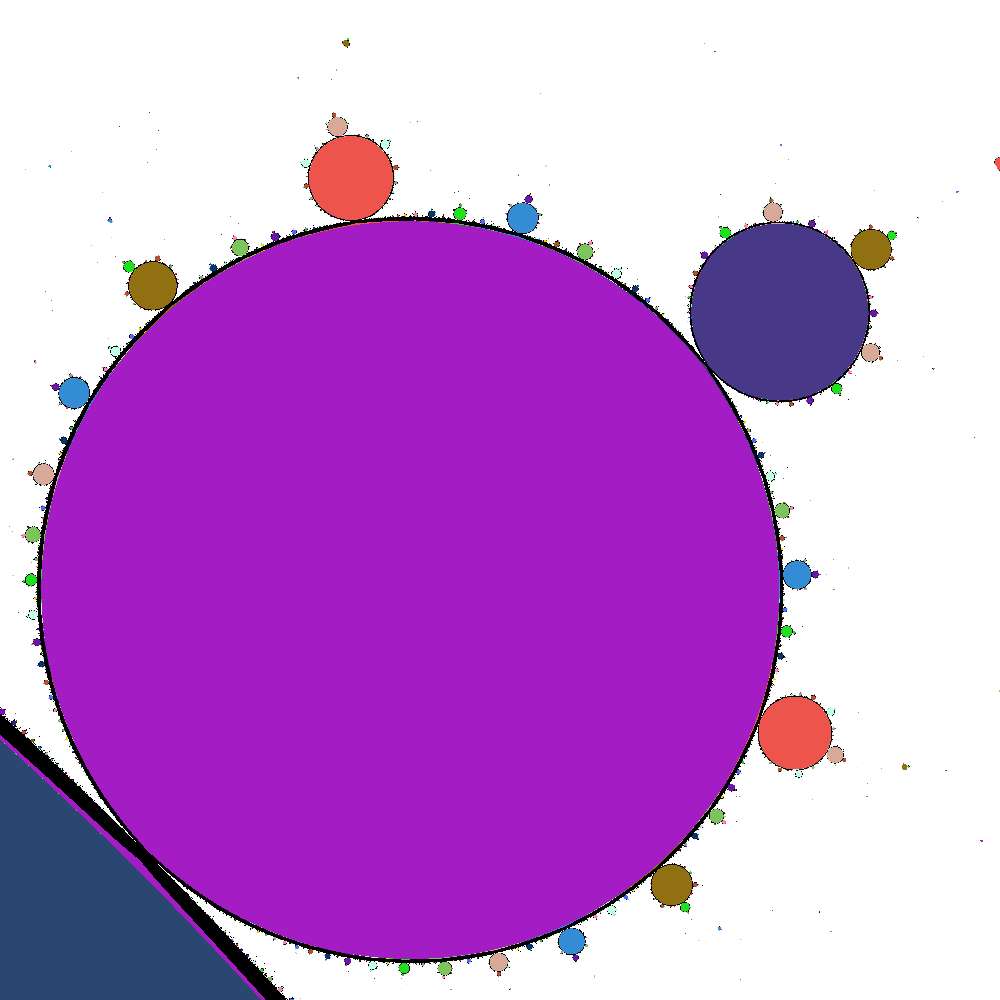

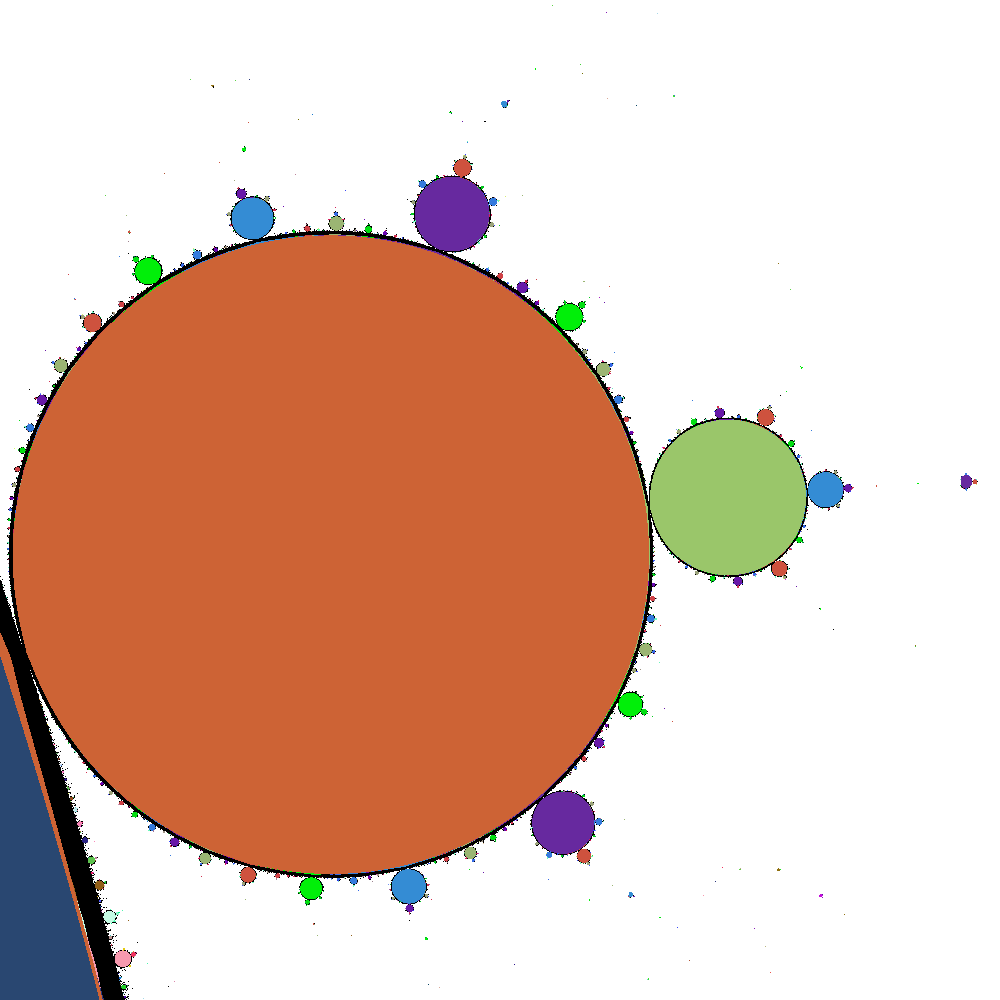

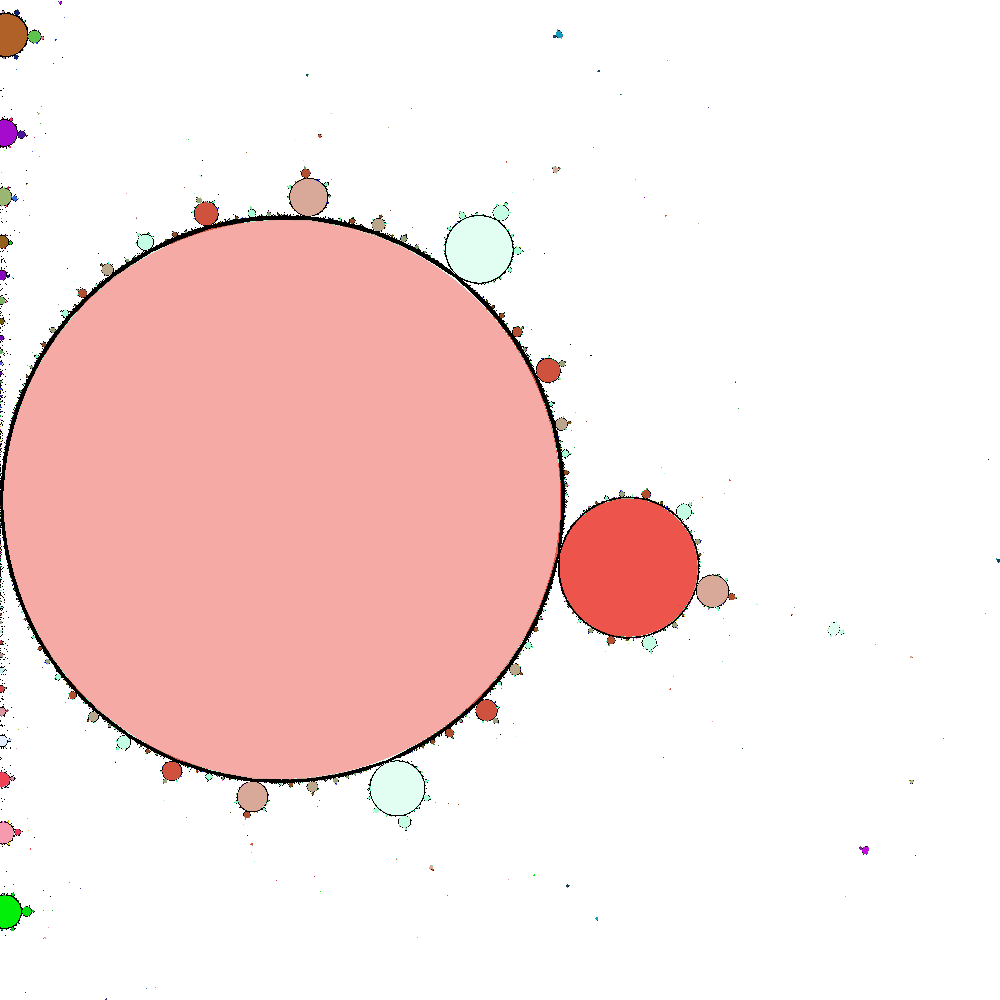

In [30]:
for k in range(2, 7):
    zp = (1 - (np.exp(2j * np.pi / k) - 1) ** 2) / 4
    dz = np.exp(3j * np.pi / k) * np.sin(np.pi / k)
    zz = zp - 1j * dz / (k - 1) / 4
    rr = abs(dz / (k - 1)) / 4
    perimg(0, zz - rr * (1+1j), zz + rr * (1+1j), 1000, 1000, 1e-6, 4096)

### Paaritu kõrvalperioodid

Nende "nibude" vahel, mis vastavad põhiperiooditele, asuvad samuti nibud - näiteks kahe ja kolme perioodi nibude vahel on järgnevad nibud, mis vastavad paaritu periooditele, ja mille puutepunktid kardioiidiga on

$$z_k = \frac{1 - \left(e^{\frac{2\pi ik}{2k + 1}} - 1\right)^2}{4}.$$

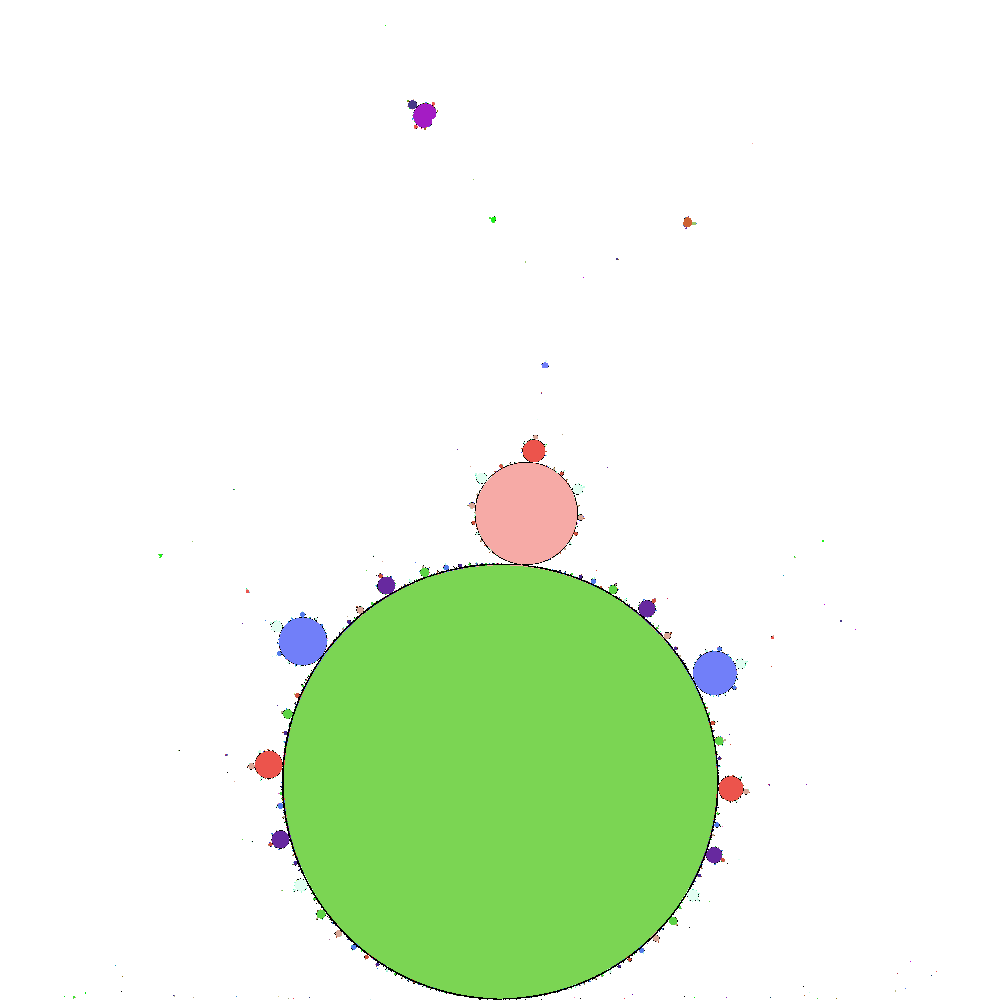

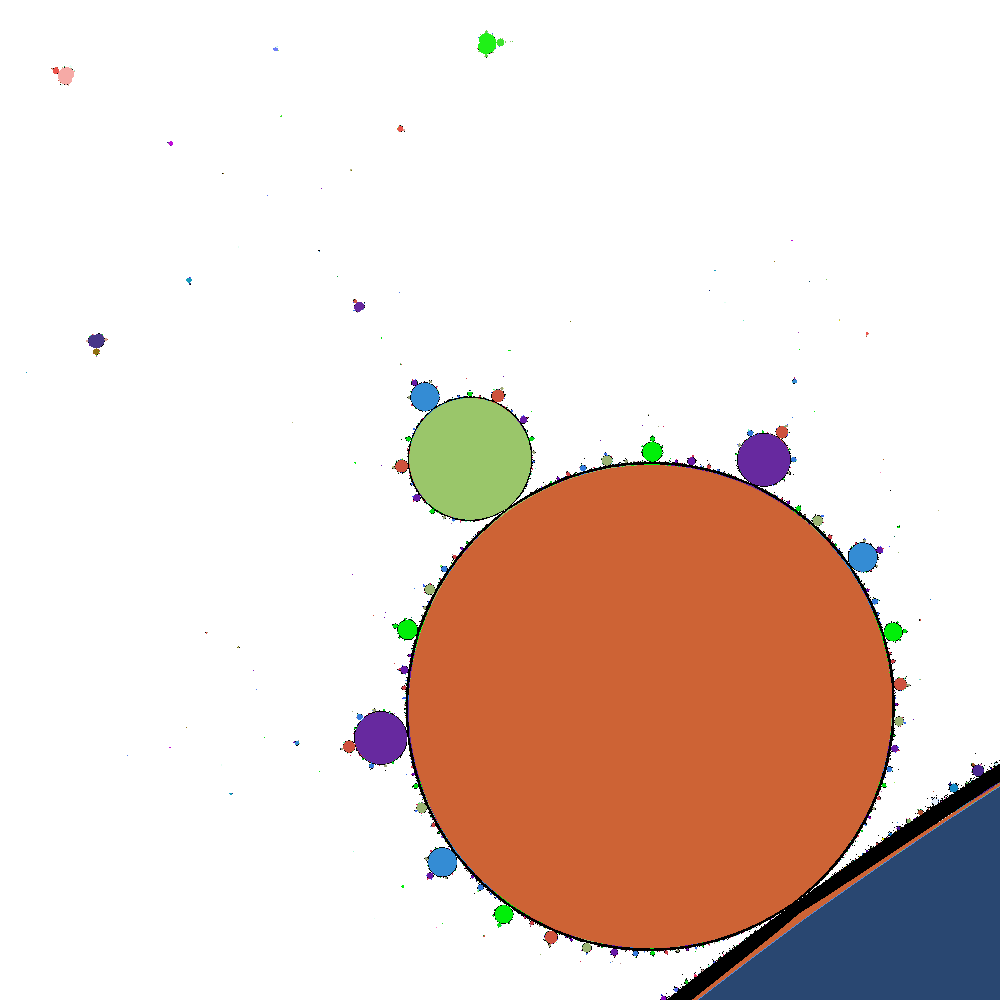

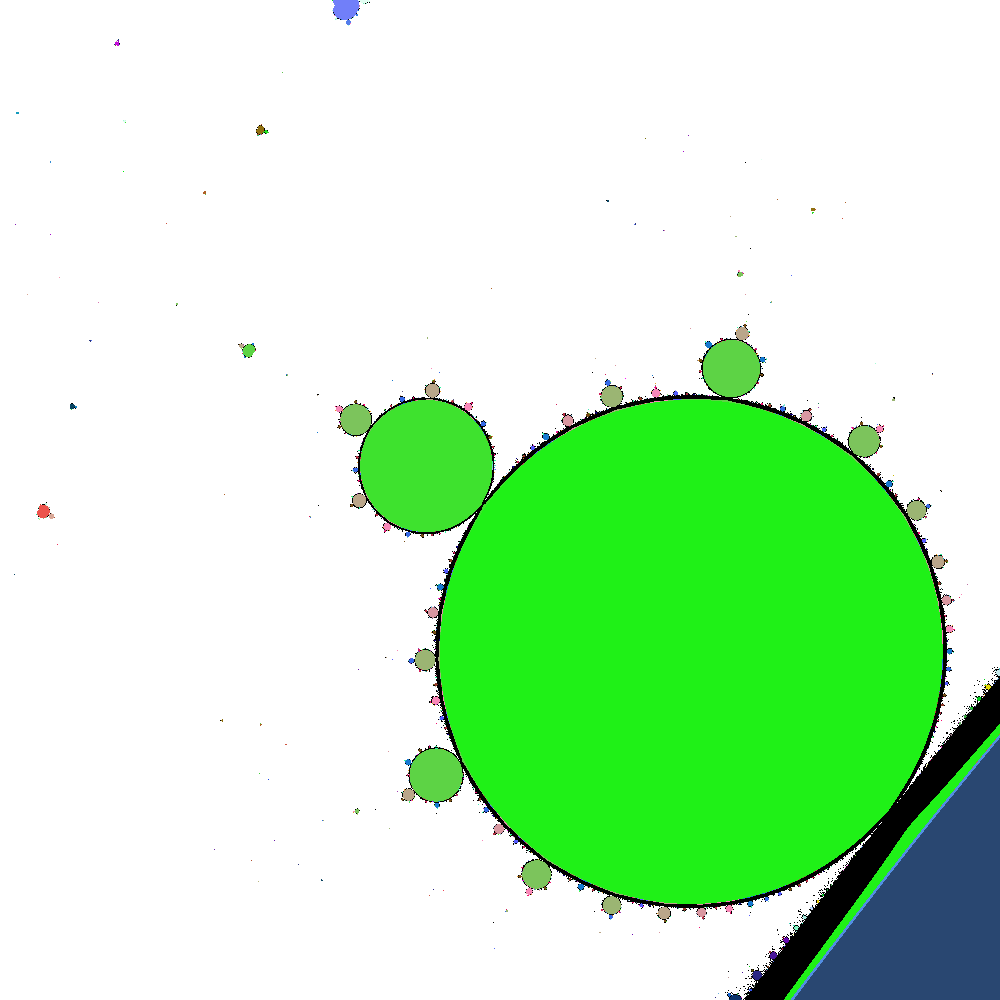

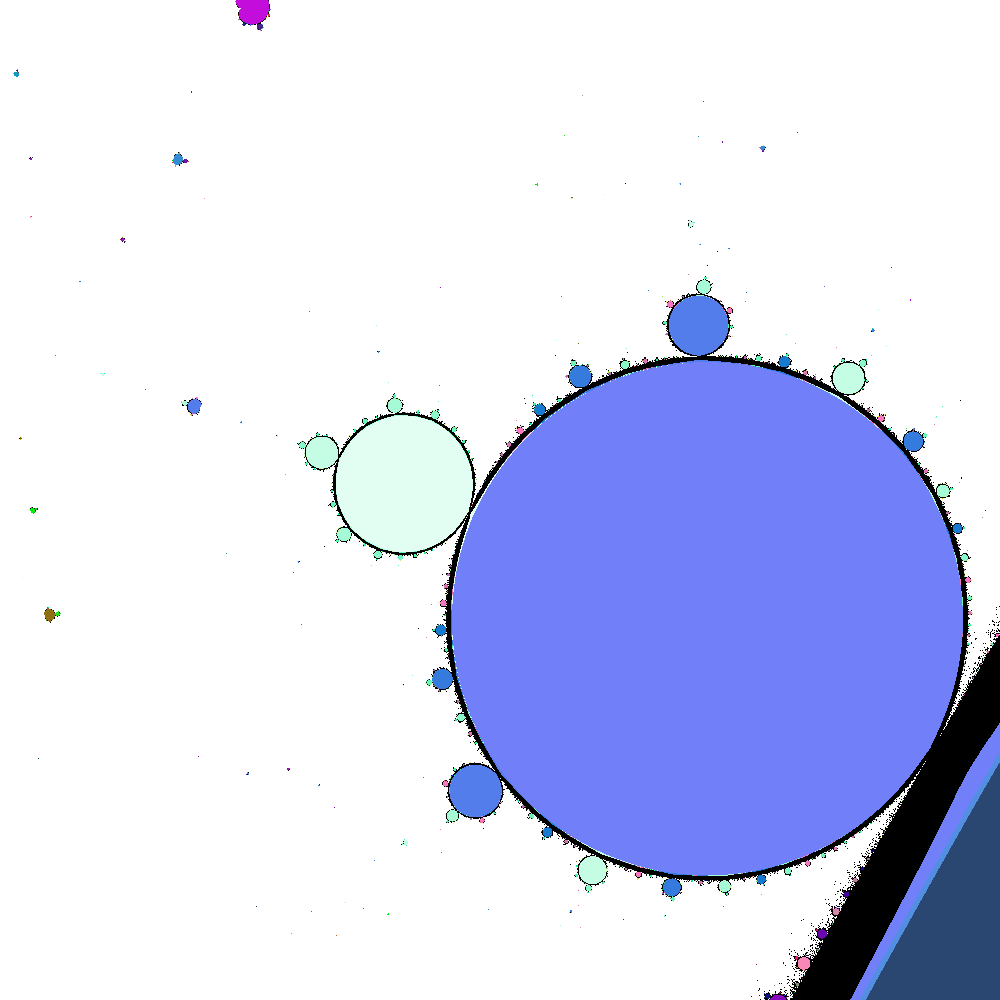

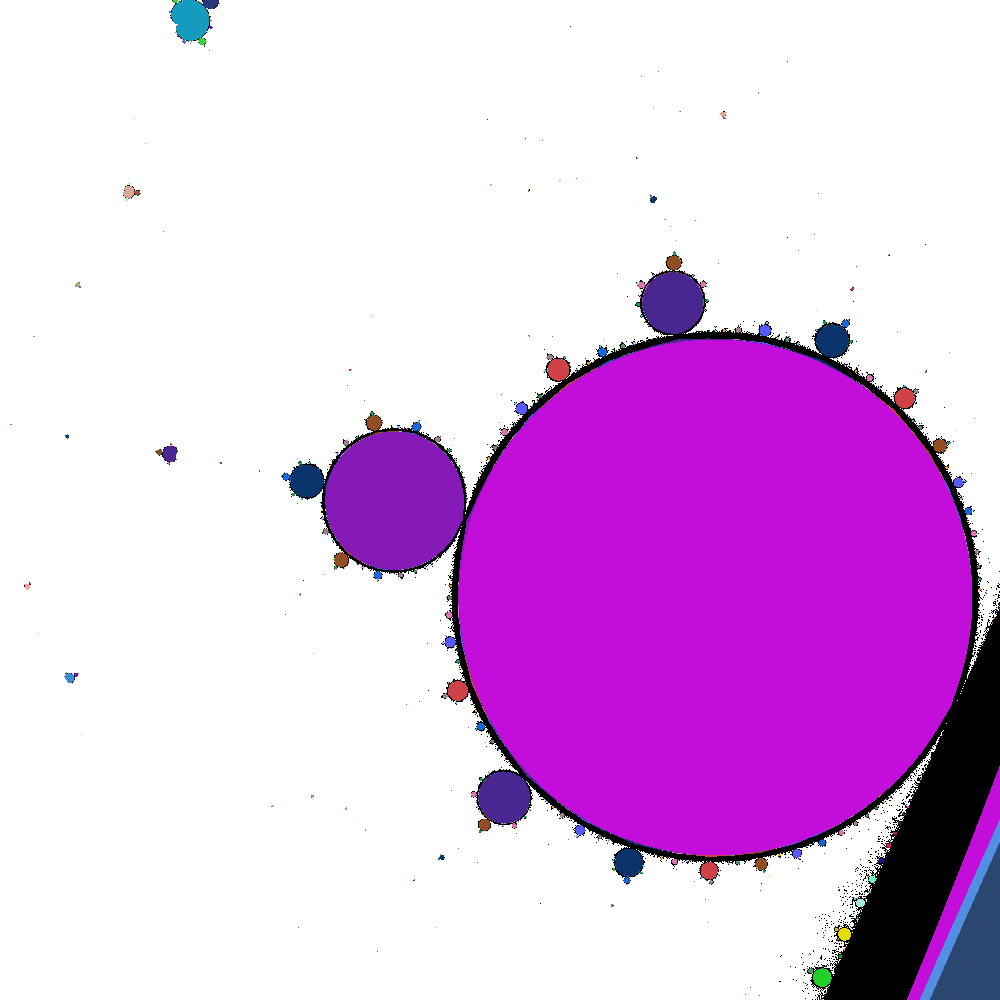

In [31]:
for k in range(1, 6):
    zp = (1 - (np.exp(k * 2j * np.pi / (2 * k + 1)) - 1) ** 2) / 4
    dz = np.exp(k * 3j * np.pi / (2 * k + 1)) * np.sin(k * np.pi / (2 * k + 1))
    zz = zp - 1j * dz / k / (k + 1) / 2
    rr = abs(dz) / k / (k + 1) / 2
    perimg(0, zz - rr * (1+1j), zz + rr * (1+1j), 1000, 1000, 1e-6, 4096)

## Julia hulgad

Me oleme näinud et Mandelbroti hulgal on alamhulgad, mille elemendid on parameetri $c$ väärtused, mille vastavad trajektoorid $z_n = f_c^n(0)$ lähenevad stabiilsetele perioodilistele trajektooridele. Kuna need trajektoorid on atraktiivsed, on neil ka atraktiivsuse basseinid. See tähendab, et on ka teised algtingmused $z_0 \in \mathbb{C}$ nii, et trajektoor $z_n = f_c^n(z_0)$ läheneb perioodilisele trajektoorile.

Kuna võrrandil $f_c^n(z) = z$, mis on $2^n$ järku polünoomvõrrand, on alati lahendid kompleksarvude tasandil, on perioodilised trajektoorid alati olemas, kuigi nad ei pruugi olla stabillsed. Seega on ka alati olemas mittetühi "vangide hulk"

$$P_c = \{z \in \mathbb{C}, f_c^n(z) \text{ on tõkestatud kui } n \to \infty\}.$$

Samuti on ka olemas "põgenike hulk"

$$E_c = \mathbb{C} \setminus P_c = \{z \in \mathbb{C}, f_c^n(z) \to \infty \text{ kui } n \to \infty\}.$$

Julia hulk, mis vastab parameetrile $c \in \mathbb{C}$, on nende hulkade ühine äär, $J_c = \partial P_c = \partial E_c$. Selle joonistamiseks defineerime funktsiooni, mis korduvalt rakendab pöördkujutust $f_c^{-1}(z) = \pm \sqrt{z - c}$, ja juhuslikult valib kas positiivset või negatiivset ruutjuurt. Tööprintsiip on sarnane itereeritud funktsioonisüsteemiga.

In [1]:
def julplot(c, npre, nmax):
    rnd.seed()
    z = 0.1j
    res = []

    for _ in range(npre):
        r = rnd.choice(2)
        z = (2 * r - 1) * np.sqrt(z - c)

    for _ in range(nmax):
        r = rnd.choice(2)
        z = (2 * r - 1) * np.sqrt(z - c)
        res.append(z)

    re = [z.real for z in res]
    im = [z.imag for z in res]

    fig = plt.figure(figsize=(8, 8), dpi=96)
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.scatter(re, im, marker=".", s=1, lw=0)
    plt.show()

Järgnevalt uurime erinevaid Julia hulke. Üldjuhul nad on fraktaalsed, kuid on ka erijuhud $c = 0$ ja $c = -2$.

### $c = 0$

Sellisel juhul on Julia hulk lihtsalt ühikring $J_0 = \{e^{i\phi}, \phi \in [0, 2\pi)\}$.

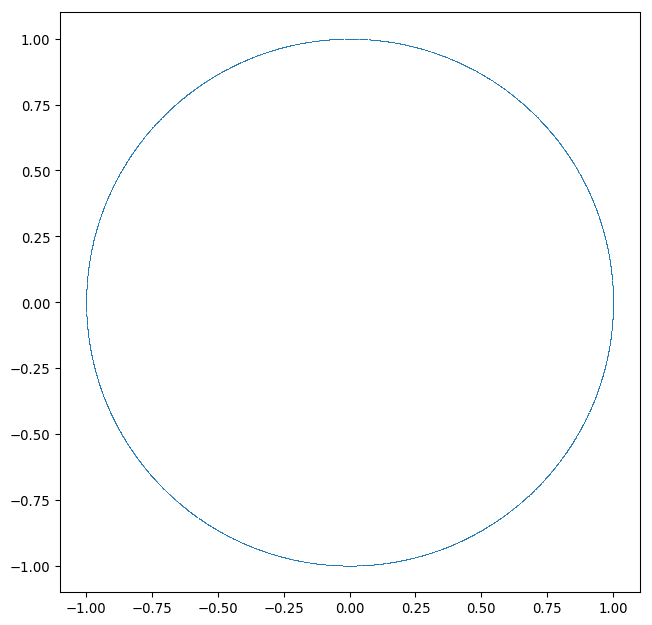

In [33]:
julplot(0.0, 100, 10000)

### $c = -2$

Teine erijuht on $c = -2$, millel Julia hulk on reaalne vahemik $J_{-2} = [-2, 2]$.

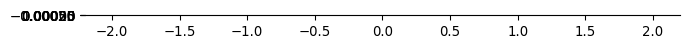

In [34]:
julplot(-2.0, 100, 10000)

### $c = -0.123 + 0.745i$

Seda kuju nimetatakse "[Douady jänese fraktaaliks](http://en.wikipedia.org/wiki/Douady_rabbit)".

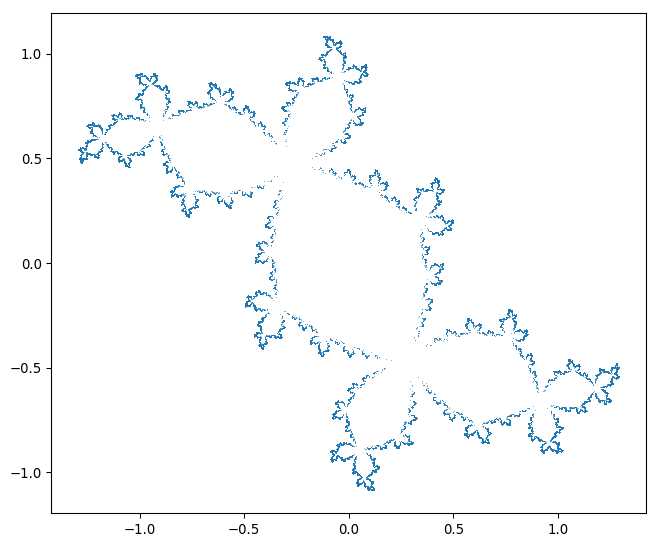

In [35]:
julplot(-0.123+0.745j, 100, 1000000)

### $c = -0.390541 - 0.568788i$

Sellisel juhul on meil [Siegeli ketas](http://en.wikipedia.org/wiki/Siegel_disc).

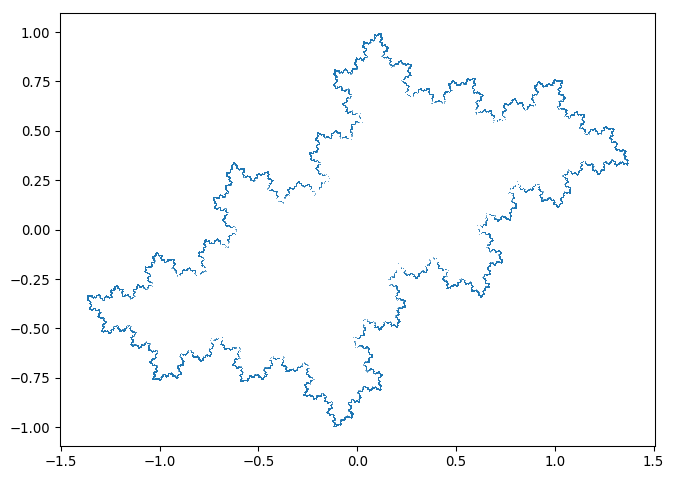

In [36]:
julplot(-0.390541-0.568788j, 100, 1000000)

### $c = -0.75$

Kui $c$ on reaalne, on Julia hulgal peegelsümmeetria. Üks näide on [San Marco fraktaal](http://mathworld.wolfram.com/SanMarcoFractal.html).

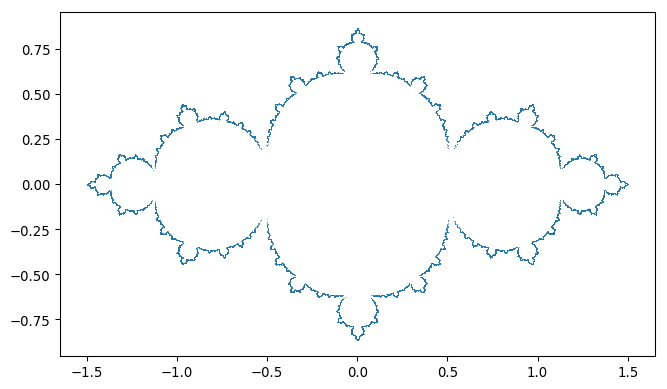

In [37]:
julplot(-0.75, 100, 1000000)

### $c = i$

Kui $c$ kuulub Mandelbroti hulga äärde, on Julia hulk sidus, ja võrdub vangide hulgaga. Klassikaline näide on [dendriidi fraktaal](http://mathworld.wolfram.com/DendriteFractal.html).

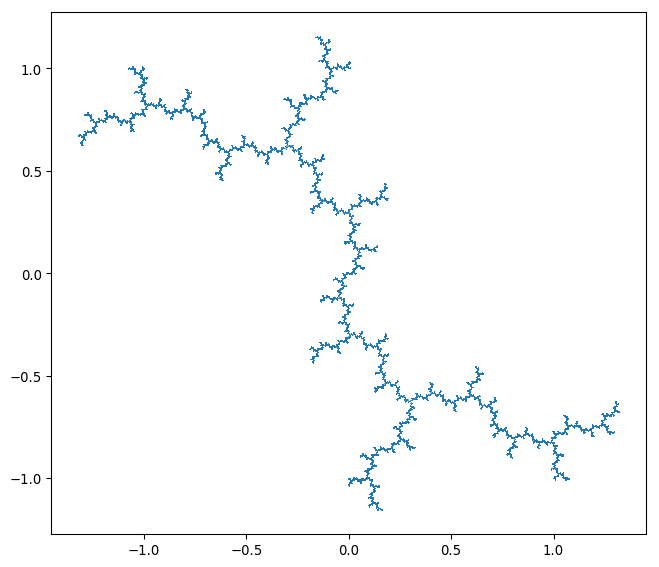

In [38]:
julplot(1.0j, 100, 1000000)

### $c = -1.401155$

Selline kuju tekib Myrebergi punktis.

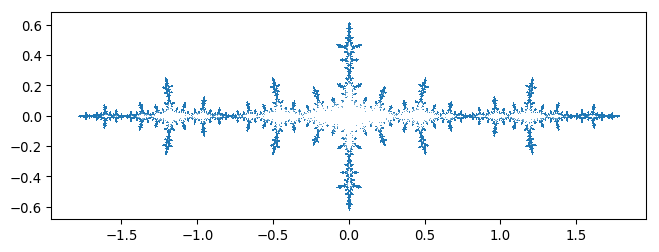

In [39]:
julplot(-1.401155, 100, 1000000)

### $c = 0.2375 + 0.674i$

Kui parameetri väärtus ei kuulu Mandelbroti hulka, koosneb Julia hulk isoleeritud punktidest.

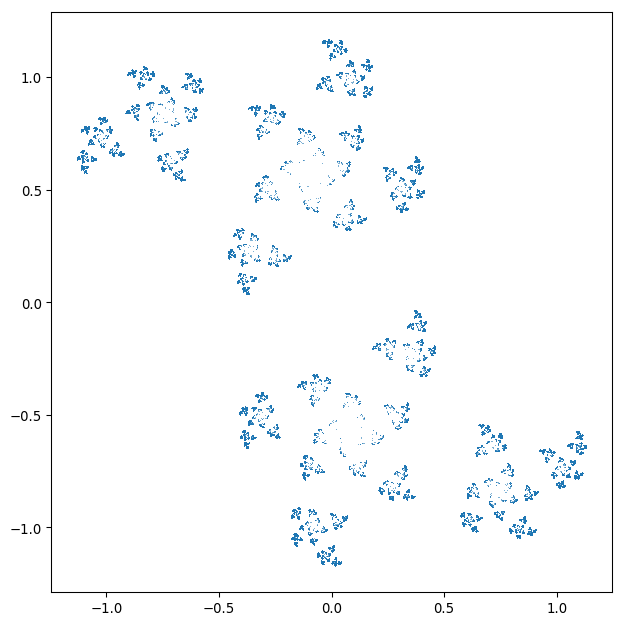

In [40]:
julplot(0.2375+0.674j, 100, 1000000)

### Test

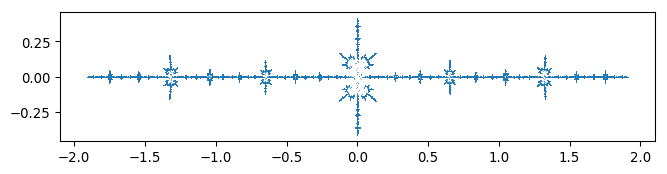

In [5]:
julplot(-1.74, 100, 1000000)

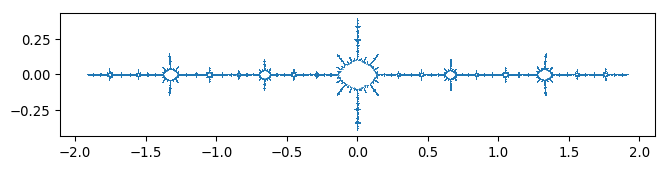

In [6]:
julplot(-1.76, 100, 1000000)